<div style="background-color: darkslategray; color: white; padding: 15px; border-radius: 8px;">
    <center><h1 style="font-family: Arial, sans-serif;">Predicting Rare Species</h1></center>
    <center><h3 style="font-family: Arial, sans-serif;">Deep Learning Project</h3></center>
</div>

**<h3>Table of Contents</h3>**
* [1. Environment Setup](#1-environment-setup)
    * [1.1 Import Libraries](#11-import-libraries)
    * [1.2 Import Dataset](#12-import-dataset)
* [2. Exploratory Data Analysis](#2-exploratory-data-analysis)
    * [2.1 Visualizations](#21-visualizations)
    * [2.2 Import Dataset](#22-feature-engineering)
* [3. Splitting the Dataset](#3-splitting-the-dataset)
* [4. Splitting the Dataset](#4-preprocessing)
    * [4.1 Image Generator and Augmentation](#41-image-generator-and-augmentation)


<div class="alert alert-block alert-success">

# **1.** Environment Setup

<div>

## 1.1 Import Libraries

In [71]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

## 1.2 Import Dataset

In [43]:
# Set up the dataset directory

# Bruna
path = r"/Users/brunasimoes/Documents/rare_species"

#Margas
# path = r"/Users/margaridabravocardoso/Desktop/rare_species"

In [44]:
# Import Metadata
metadata_path = os.path.join(path, "metadata.csv")

df = pd.read_csv(metadata_path)

df.head()

rare_species_id  eol_content_id  eol_page_id  \
0  75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1  28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2  00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3  29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4  94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   

    kingdom    phylum            family  \
0  animalia  mollusca         unionidae   
1  animalia  chordata       geoemydidae   
2  animalia  chordata  cryptobranchidae   
3  animalia  chordata          turdidae   
4  animalia  chordata         indriidae   

                                                          file_path  
0         mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg  
1       chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg  
2  chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg  
3        chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg  
4        chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg

In [45]:
df.shape # 11983 images

(11983, 7)

In [46]:
# Windows
# df["full_file_path"] = df["file_path"].apply(lambda x: os.path.join(path, x.replace("/", "\\")))

# Mac
df["full_file_path"] = df["file_path"].apply(lambda x: os.path.join(path, x))
df

rare_species_id  eol_content_id  eol_page_id  \
0      75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1      28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2      00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3      29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4      94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   
...                                     ...             ...          ...   
11978  1fa96ea5-32fa-4a25-b8d2-fa99f6e2cb89        29734618      1011315   
11979  628bf2b4-6ecc-4017-a8e6-4306849e0cfc        29972861      1056842   
11980  0ecfdec9-b1cd-4d43-96fc-2f8889ec1ad9        30134195     52572074   
11981  27fdb1e9-c5fb-459a-8b6a-6fb222b1c512         9474963     46559139   
11982  54894a59-151f-4814-ac32-3a336841e58e         9465817       326525   

        kingdom    phylum            family  \
0      animalia  mollusca         unionidae   
1      animalia  chordata       geoemydidae   
2      animalia  chordata  cryptobranchidae   
3      animalia  chordata          turdidae   
4      animalia  chordata         indriidae   
...         ...       ...               ...   
11978  animalia  chordata         leporidae   
11979  animalia  chordata          emydidae   
11980  animalia  chordata        dasyatidae   
11981  animalia  chordata        mustelidae   
11982  animalia  chordata         lemuridae   

                                                              file_path  \
0             mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg   
1           chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg   
2      chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg   
3            chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg   
4            chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg   
...                                                                 ...   
11978        chordata_leporidae/29734618_1011315_eol-full-size-copy.jpg   
11979         chordata_emydidae/29972861_1056842_eol-full-size-copy.jpg   
11980      chordata_dasyatidae/30134195_52572074_eol-full-size-copy.jpg   
11981       chordata_mustelidae/9474963_46559139_eol-full-size-copy.jpg   
11982          chordata_lemuridae/9465817_326525_eol-full-size-copy.jpg   

                                                                                                   full_file_path  
0             /Users/brunasimoes/Documents/rare_species/mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg  
1           /Users/brunasimoes/Documents/rare_species/chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg  
2      /Users/brunasimoes/Documents/rare_species/chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg  
3            /Users/brunasimoes/Documents/rare_species/chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg  
4            /Users/brunasimoes/Documents/rare_species/chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg  
...                                                                                                           ...  
11978        /Users/brunasimoes/Documents/rare_species/chordata_leporidae/29734618_1011315_eol-full-size-copy.jpg  
11979         /Users/brunasimoes/Documents/rare_species/chordata_emydidae/29972861_1056842_eol-full-size-copy.jpg  
11980      /Users/brunasimoes/Documents/rare_species/chordata_dasyatidae/30134195_52572074_eol-full-size-copy.jpg  
11981       /Users/brunasimoes/Documents/rare_species/chordata_mustelidae/9474963_46559139_eol-full-size-copy.jpg  
11982          /Users/brunasimoes/Documents/rare_species/chordata_lemuridae/9465817_326525_eol-full-size-copy.jpg  

[11983 rows x 8 columns]

In [47]:
pd.set_option('display.max_colwidth', None)
print(df['full_file_path'])


0               /Users/brunasimoes/Documents/rare_species/mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg
1             /Users/brunasimoes/Documents/rare_species/chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg
2        /Users/brunasimoes/Documents/rare_species/chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg
3              /Users/brunasimoes/Documents/rare_species/chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg
4              /Users/brunasimoes/Documents/rare_species/chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg
                                                            ...                                                    
11978          /Users/brunasimoes/Documents/rare_species/chordata_leporidae/29734618_1011315_eol-full-size-copy.jpg
11979           /Users/brunasimoes/Documents/rare_species/chordata_emydidae/29972861_1056842_eol-full-size-copy.jpg
11980        /Users/brunasimoes/Documents/rare_species/chordata_dasyatid

<div class="alert alert-block alert-success">

# **2.** Exploratory Data Analysis

<div>

## 2.1 Visualizations

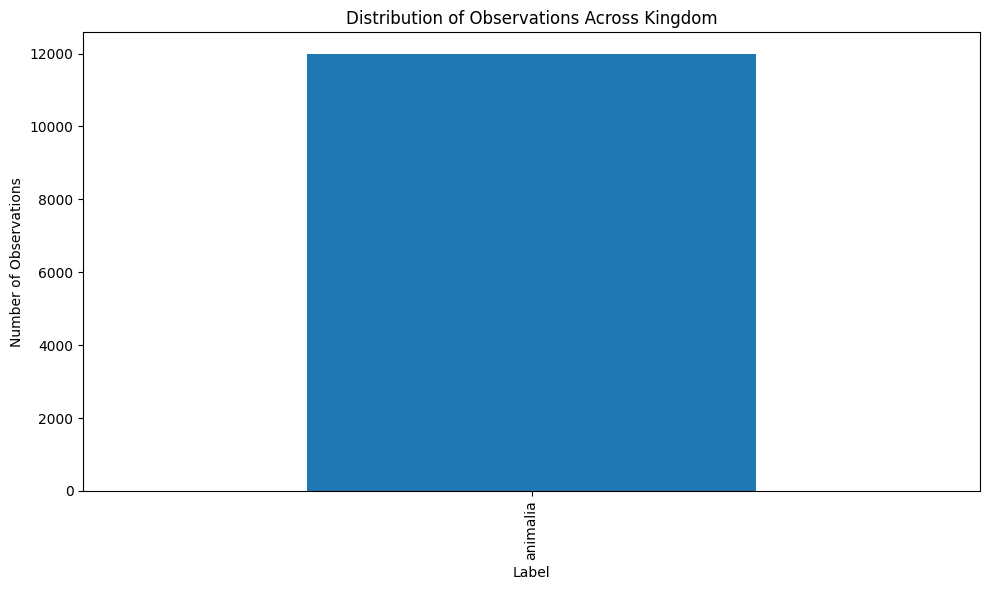

In [48]:
kingdom_counts = df['kingdom'].value_counts()

plt.figure(figsize=(10, 6))
kingdom_counts.plot(kind='bar')
plt.title('Distribution of Observations Across Kingdom')
plt.xlabel('Label')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

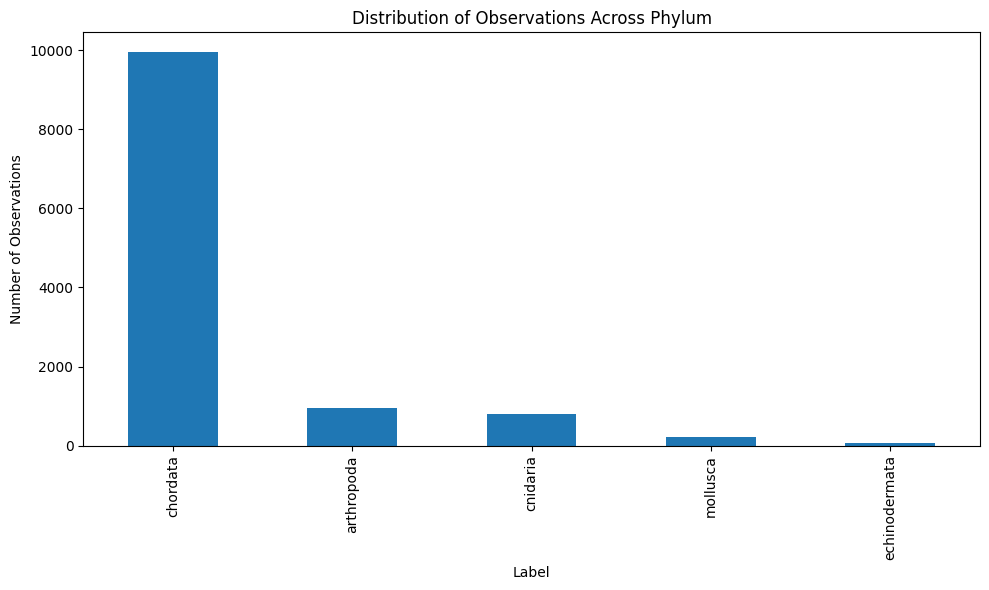

In [49]:
phylum_counts = df['phylum'].value_counts()

plt.figure(figsize=(10, 6))
phylum_counts.plot(kind='bar')
plt.title('Distribution of Observations Across Phylum')
plt.xlabel('Label')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

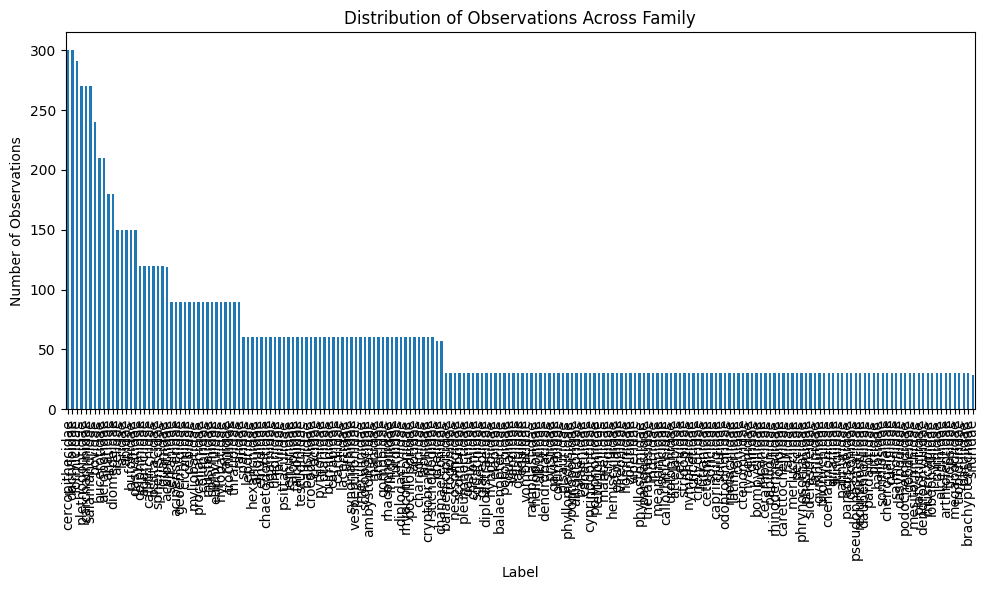

In [50]:
family_counts = df['family'].value_counts()

plt.figure(figsize=(10, 6))
family_counts.plot(kind='bar')
plt.title('Distribution of Observations Across Family')
plt.xlabel('Label')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [51]:
family_counts = df["family"].value_counts(normalize=True)*100

df_family_proportions = pd.DataFrame({
    "Family": family_counts.index,
    "Proportion (%)": family_counts.values.round(4)  
})

df_family_proportions # 202 different families

Family  Proportion (%)
0      cercopithecidae          2.5035
1          dactyloidae          2.5035
2           formicidae          2.4284
3       plethodontidae          2.2532
4       carcharhinidae          2.2532
..                 ...             ...
197       megapodiidae          0.2504
198       tropiduridae          0.2504
199          parulidae          0.2504
200  brachypteraciidae          0.2504
201          siluridae          0.2420

[202 rows x 2 columns]

In [52]:
num_families_025 = int((df_family_proportions["Proportion (%)"] <= 0.2505).sum())
num_families_025 # 118 families have less than 0.2505% of images

118

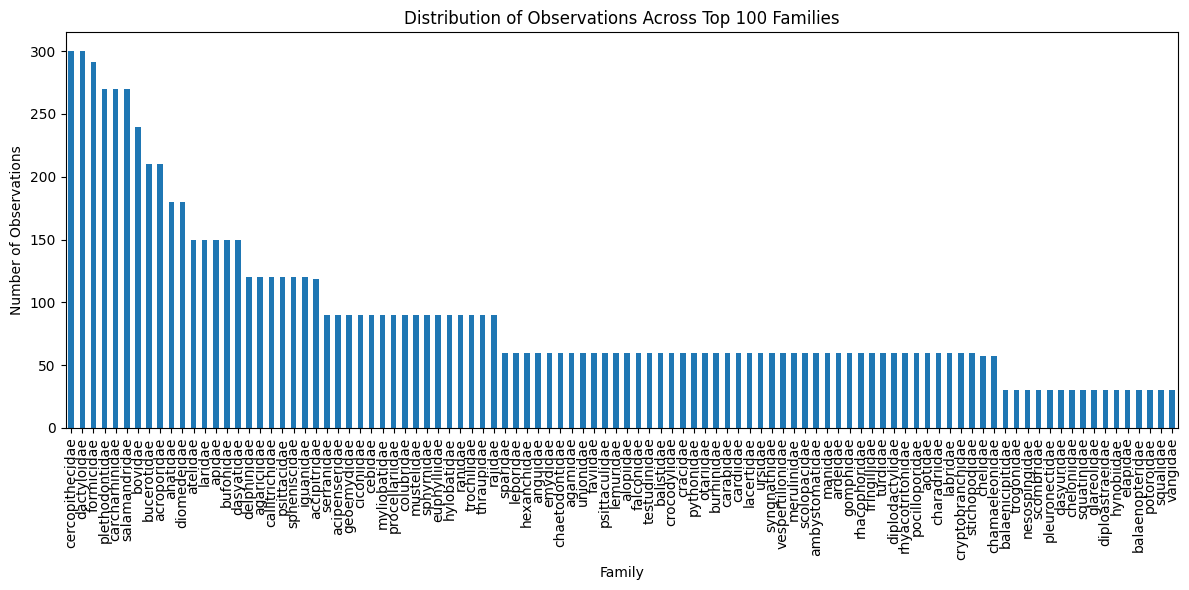

In [53]:
top_100_families = df['family'].value_counts().nlargest(100)

# Plot the distribution
plt.figure(figsize=(12, 6))
top_100_families.plot(kind='bar')
plt.title('Distribution of Observations Across Top 100 Families')
plt.xlabel('Family')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [54]:
top_84_family_proportion_sum = df_family_proportions.iloc[:84]["Proportion (%)"].sum()
top_84_family_proportion_sum # although 118 families represent less than 0.25% of the dataset, the 84 that have >0.25% represent only 70.46% of the dataset

np.float64(70.4666)

## 2.2 Feature Engineering

In [55]:
# is it better to predict phylum and then family or a concatenation of the two?

In [56]:
df["phylum_family"] = df["phylum"] + "_" + df["family"]
df

rare_species_id  eol_content_id  eol_page_id  \
0      75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1      28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2      00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3      29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4      94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   
...                                     ...             ...          ...   
11978  1fa96ea5-32fa-4a25-b8d2-fa99f6e2cb89        29734618      1011315   
11979  628bf2b4-6ecc-4017-a8e6-4306849e0cfc        29972861      1056842   
11980  0ecfdec9-b1cd-4d43-96fc-2f8889ec1ad9        30134195     52572074   
11981  27fdb1e9-c5fb-459a-8b6a-6fb222b1c512         9474963     46559139   
11982  54894a59-151f-4814-ac32-3a336841e58e         9465817       326525   

        kingdom    phylum            family  \
0      animalia  mollusca         unionidae   
1      animalia  chordata       geoemydidae   
2      animalia  chordata  cryptobranchidae   
3      animalia  chordata          turdidae   
4      animalia  chordata         indriidae   
...         ...       ...               ...   
11978  animalia  chordata         leporidae   
11979  animalia  chordata          emydidae   
11980  animalia  chordata        dasyatidae   
11981  animalia  chordata        mustelidae   
11982  animalia  chordata         lemuridae   

                                                              file_path  \
0             mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg   
1           chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg   
2      chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg   
3            chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg   
4            chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg   
...                                                                 ...   
11978        chordata_leporidae/29734618_1011315_eol-full-size-copy.jpg   
11979         chordata_emydidae/29972861_1056842_eol-full-size-copy.jpg   
11980      chordata_dasyatidae/30134195_52572074_eol-full-size-copy.jpg   
11981       chordata_mustelidae/9474963_46559139_eol-full-size-copy.jpg   
11982          chordata_lemuridae/9465817_326525_eol-full-size-copy.jpg   

                                                                                                   full_file_path  \
0             /Users/brunasimoes/Documents/rare_species/mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg   
1           /Users/brunasimoes/Documents/rare_species/chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg   
2      /Users/brunasimoes/Documents/rare_species/chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg   
3            /Users/brunasimoes/Documents/rare_species/chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg   
4            /Users/brunasimoes/Documents/rare_species/chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg   
...                                                                                                           ...   
11978        /Users/brunasimoes/Documents/rare_species/chordata_leporidae/29734618_1011315_eol-full-size-copy.jpg   
11979         /Users/brunasimoes/Documents/rare_species/chordata_emydidae/29972861_1056842_eol-full-size-copy.jpg   
11980      /Users/brunasimoes/Documents/rare_species/chordata_dasyatidae/30134195_52572074_eol-full-size-copy.jpg   
11981       /Users/brunasimoes/Documents/rare_species/chordata_mustelidae/9474963_46559139_eol-full-size-copy.jpg   
11982          /Users/brunasimoes/Documents/rare_species/chordata_lemuridae/9465817_326525_eol-full-size-copy.jpg   

                   phylum_family  
0             mollusca_unionidae  
1           chordata_geoemydidae  
2      chordata_cryptobranchidae  
3              chordata_turdidae  
4             chordata_indriidae  
...                          ...  

In [57]:
family_phylum_counts = df.groupby("phylum")["family"].nunique()

In [58]:
family_phylum_counts # the phylum with the most families is chordata

phylum
arthropoda        17
chordata         166
cnidaria          13
echinodermata      1
mollusca           5
Name: family, dtype: int64

In [59]:
anomaly_counts = df.groupby("family")["phylum"].nunique()

In [60]:
anomaly_counts.value_counts() # there are no families that belong to more than 1 phylum

phylum
1    202
Name: count, dtype: int64

In [61]:
phylum_family_counts = df["phylum_family"].value_counts(normalize=True)*100

df_phylum_family_proportions = pd.DataFrame({
    "phylum_family": phylum_family_counts.index,
    "Proportion (%)": phylum_family_counts.values.round(4)  
})

df_phylum_family_proportions # 202 different families

phylum_family  Proportion (%)
0      chordata_cercopithecidae          2.5035
1          chordata_dactyloidae          2.5035
2         arthropoda_formicidae          2.4284
3       chordata_plethodontidae          2.2532
4       chordata_carcharhinidae          2.2532
..                          ...             ...
197       chordata_megapodiidae          0.2504
198       chordata_tropiduridae          0.2504
199          chordata_parulidae          0.2504
200  chordata_brachypteraciidae          0.2504
201          chordata_siluridae          0.2420

[202 rows x 2 columns]

<div class="alert alert-block alert-success">

# **3.** Splitting the Dataset

<div>

In [62]:
train_path = os.path.join(path, 'train')
valid_path = os.path.join(path, 'valid')
test_path = os.path.join(path, 'test')

# Split the data into training, validation, and testing sets
train_df, test_valid_df = train_test_split(df, test_size=0.3, shuffle=True, random_state=42, stratify=df['family'])
valid_df, test_df = train_test_split(test_valid_df, test_size=0.5, shuffle=True, random_state=42, stratify=test_valid_df['family'])

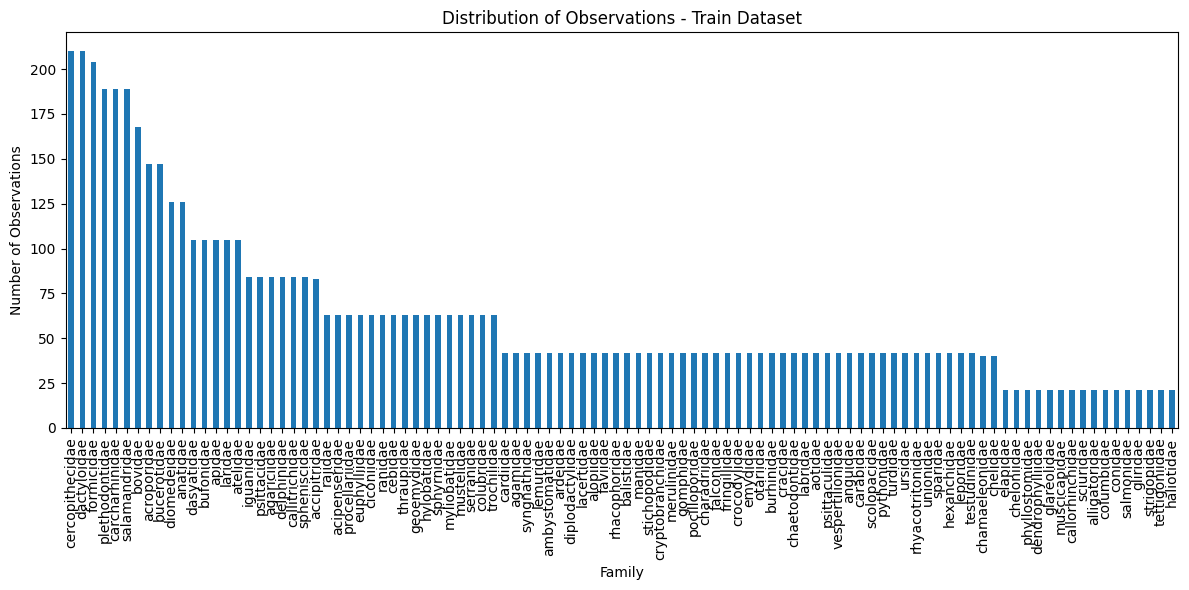

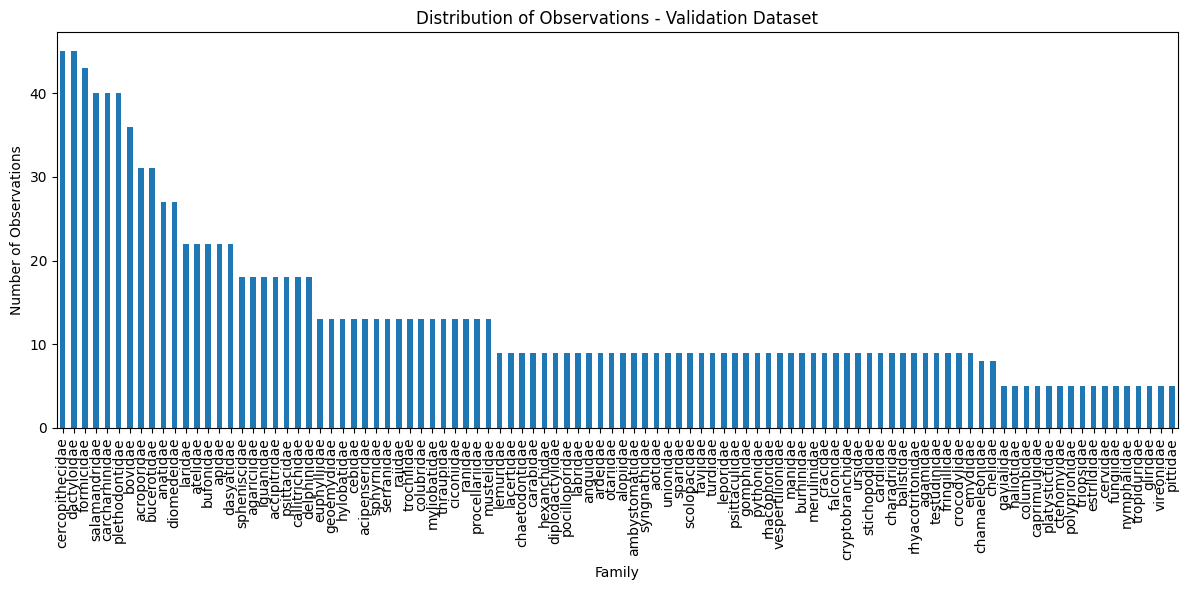

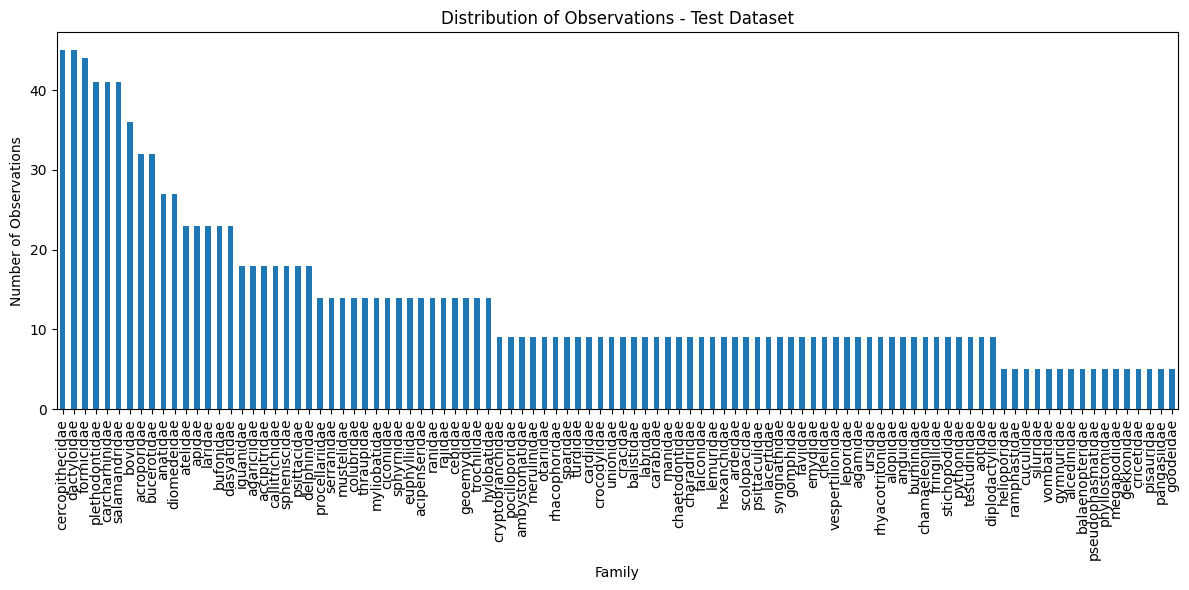

In [63]:
# Train
train_df_counts = train_df['family'].value_counts().nlargest(100)

plt.figure(figsize=(12, 6))
train_df_counts.plot(kind='bar')
plt.title('Distribution of Observations - Train Dataset')
plt.xlabel('Family')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

# Validation
valid_df_counts = valid_df['family'].value_counts().nlargest(100)

plt.figure(figsize=(12, 6))
valid_df_counts.plot(kind='bar')
plt.title('Distribution of Observations - Validation Dataset')
plt.xlabel('Family')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

# Test
test_df_counts = test_df['family'].value_counts().nlargest(100)

plt.figure(figsize=(12, 6))
test_df_counts.plot(kind='bar')
plt.title('Distribution of Observations - Test Dataset')
plt.xlabel('Family')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

In [64]:
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(valid_df)}")
print(f"Testing samples: {len(test_df)}")

Training samples: 8388
Validation samples: 1797
Testing samples: 1798


<div class="alert alert-block alert-success">

# **4.** Preprocessing

<div>

## 4.1 Image Generator and Augmentation

- Normalizes pixel values (e.g., rescaling from [0,255] to [0,1]).
- Resizes images to a fixed size (e.g., 150x150 pixels).
- Applies augmentation (only during training).
- Converts images to batches (e.g., batch_size=32 loads 32 images at a time).

In [65]:
# base_path = "/Users/margaridabravocardoso/Desktop/rare_species/"
# train_df["full_file_path"] = base_path + train_df["file_path"]
# valid_df["full_file_path"] = base_path + valid_df["file_path"]
# test_df["full_file_path"] = base_path + test_df["file_path"]
print(train_df["full_file_path"].apply(os.path.exists).value_counts())

full_file_path
True    8388
Name: count, dtype: int64


In [66]:
# Set up the ImageDataGenerators and define the augmentation parameters:
train_datagen = ImageDataGenerator(
    #rotation_range=20,      
    #zoom_range=0.2,
    #rotation_range=0, 
    #width_shift_range=0.1,  
    #height_shift_range=0.1,  
    #zoom_range=0,  # No zoom
    #horizontal_flip=False,  
    #vertical_flip=False,  
    #brightness_range=[0.8, 1.2],  
    #fill_mode='nearest', 
)
valid_datagen = ImageDataGenerator(
    #rotation_range=20,      
    #zoom_range=0.2,
    """""
    rotation_range=0, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    zoom_range=0,  # No zoom
    horizontal_flip=False,  
    vertical_flip=False, 
    brightness_range=[0.8, 1.2],  
    fill_mode='nearest', 
    """
)
test_datagen = ImageDataGenerator(
    """""
    #rotation_range=20,       
    #zoom_range=0.2,  
    rotation_range=0,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    zoom_range=0,  
    horizontal_flip=False,  
    vertical_flip=False, 
    brightness_range=[0.8, 1.2],  
    fill_mode='nearest', 
    """
)

# Flow from directory for training data
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=train_path,
    x_col='full_file_path',
    y_col='family',
    color_mode='rgb', 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical',
    shuffle = True,
    class_weights = 'balanced',
    rescale=1./255  # Normalization factor
)

# Flow from directory for validation data
valid_generator = valid_datagen.flow_from_dataframe(
    valid_df,
    directory=valid_path,
    x_col='full_file_path',
    color_mode='rgb',
    y_col='family',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    shuffle = False,
    class_weights = 'balanced',
    rescale=1./255  # Normalization factor
)

# Flow from directory for testing data
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=test_path,
    x_col='full_file_path',
    color_mode='rgb',
    y_col='family',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    shuffle = False, 
    class_weights = 'balanced',
    rescale=1./255  # Normalization factor
)

Found 8388 validated image filenames belonging to 202 classes.
Found 1797 validated image filenames belonging to 202 classes.
Found 1798 validated image filenames belonging to 202 classes.


In [67]:
print(df["full_file_path"].head())  # Verifique se os caminhos parecem corretos
print(df["full_file_path"].apply(os.path.exists).value_counts())  # Quantos arquivos realmente existem?

0           /Users/brunasimoes/Documents/rare_species/mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg
1         /Users/brunasimoes/Documents/rare_species/chordata_geoemydidae/20969394_793083_eol-full-size-copy.jpg
2    /Users/brunasimoes/Documents/rare_species/chordata_cryptobranchidae/28895411_319982_eol-full-size-copy.jpg
3          /Users/brunasimoes/Documents/rare_species/chordata_turdidae/29658536_45510188_eol-full-size-copy.jpg
4          /Users/brunasimoes/Documents/rare_species/chordata_indriidae/21252576_7250886_eol-full-size-copy.jpg
Name: full_file_path, dtype: object
full_file_path
True    11983
Name: count, dtype: int64


In [68]:
num_classes = len(train_generator.class_indices)
print(num_classes)

202


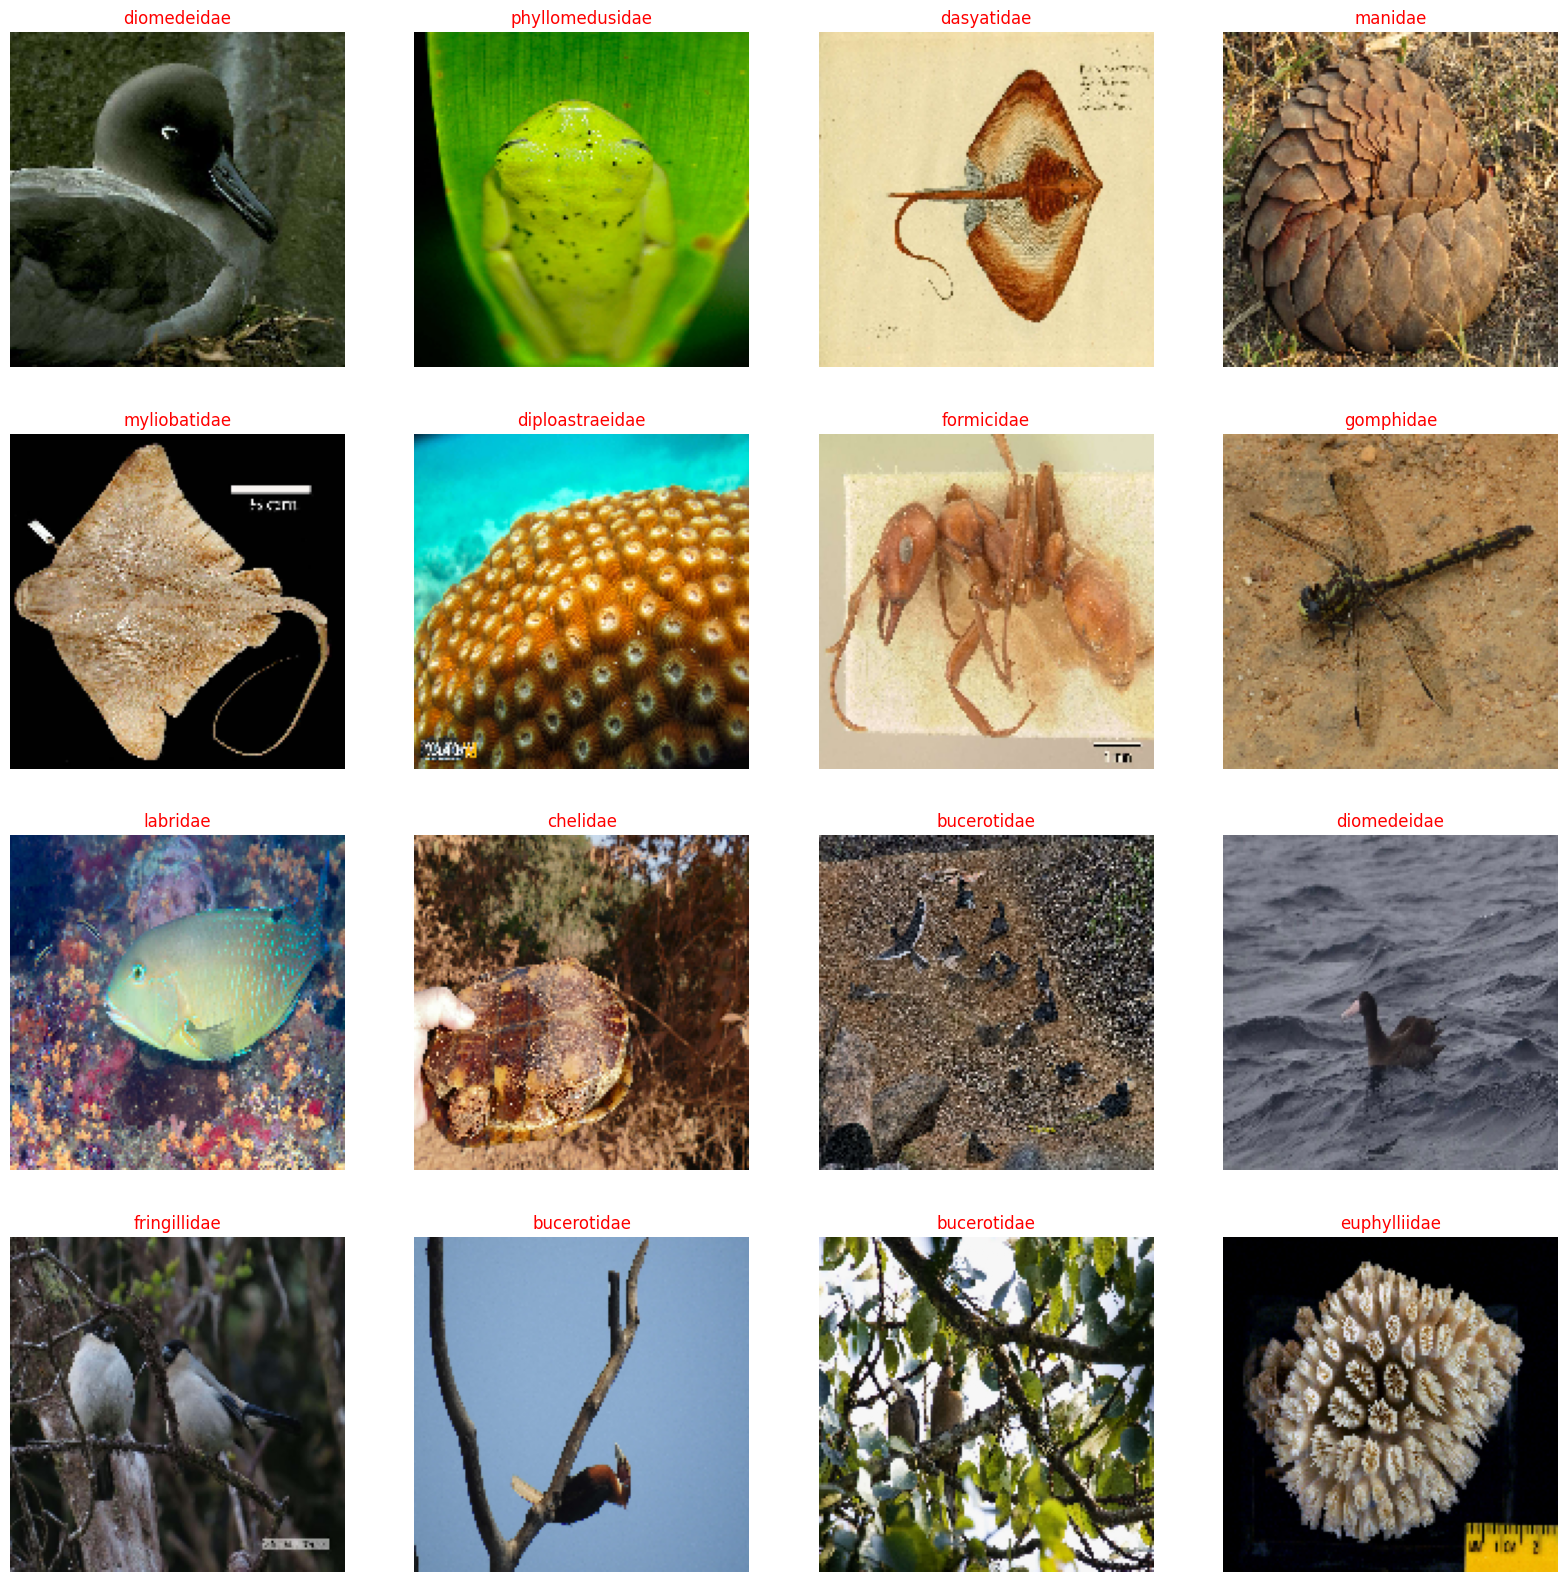

In [69]:
g_dict = train_generator.class_indices
classes= list(g_dict.keys())

images, labels = next(train_generator)

plt.figure(figsize= (20,20))

for i in range (16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index= np.argmax(labels[i]) #[0,0,0,1,0]
    class_name = classes[index]
    plt.title(class_name,c='r', fontsize=12)
    plt.axis('off')
plt.show()

<div class="alert alert-block alert-success">

# **5.** Models

<div>

## Sequential

In [74]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(202, activation="softmax"))

In [75]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 202)            │       103,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,555,658 (13.56 MB)

 Trainable params: 3,555,658 (13.56 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', 
              metrics= ['accuracy'])

In [77]:
epochs=15
history = model.fit(train_generator, epochs= epochs, verbose= 1, batch_size = 20, validation_data= valid_generator)

/Users/brunasimoes/Desktop/Nova IMS/2 Semestre/Trimestral/Deep Learning/deep-learning-project/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_4" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 150, 150, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 150, 150, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
xaxis = range(1,epochs+1)
plt.plot(xaxis, loss_train, 'g', label='Training accuracy')
plt.plot(xaxis, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
xaxis = range(1,epochs+1)
plt.plot(xaxis, loss_train, 'g', label='Training loss')
plt.plot(xaxis, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)